
## 2. Somehow able to read data in these images and convert it to row and column format, so that the data can be inserted into database:  

To have a full-fledged solution for this part is really difficult task. For that reason, you 
are expected here to make a working solution for only the images mentioned in 
dataset_part2 (contains 2 bar graph plots).  You can have different code that works 
for  different images. 

Make use of existing OCR engines  to extract the information in the given images. 

__Tasks:__
- a) Extract and print  ‘title of graph’ and make bounding boxes around the texts detected in the images and save the resultant images with Bounding boxes.Save images as ’ {image_name}_bboxes.png’ 
- b) Make use of computer vision skills, get individual bars and their values (Hint : contour detection, edge detection etc). Write the individual results into ‘{image_name}.csv’  


__Deliverables:__  
- 4. Complete code or notebook .
- 5. Documentation containing instructions to run your code and a requirements.txt file (You can also make use of Markdown cells if you are using a notebook) 

__Resources for part 2:__
- a) The easiest way to get started is using EasyOCR (https://pypi.org/project/easyocr/) . 
- b) Look at cv2 contour detection, edge detection, corner detection. (Feel free to ask and discuss approaches on the graph2table teams channel)

### Install pytesseract if not already installed

In [ ]:
#!pip install pytesseract opencv-python

### Install EasyOCR if not already installed

In [2]:
#!pip install easyocr --user

### Add all necessary imports

In [2]:
import os
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
import easyocr

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

## a) Extract and print  ‘title of graph’ and make bounding boxes around the texts detected in the images and save the resultant images with Bounding boxes.Save images as ’ {image_name}_bboxes.png’ 

### First attempt with Pytesserect



 Image: image_1.png
Extracted Title: Bar Graph PPT
Saved: output_bboxes\image_1_bboxes_pytesseract_filtered.png
All text: ['', '', '', '', 'Bar', 'Graph', 'PPT', '', '', '', ' ', '', '', '', 'January', 'February', '=', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


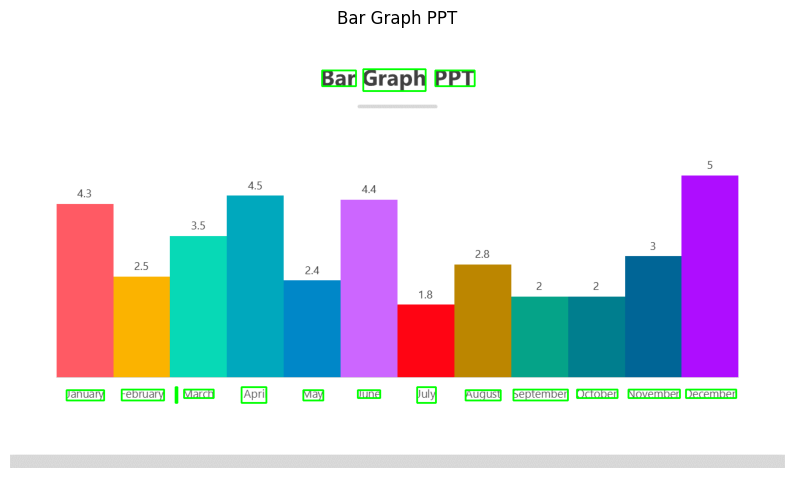

In [16]:
# Path to your image
image_path = 'dataset_part2/image_1.png'
output_dir = 'output_bboxes'

os.makedirs(output_dir, exist_ok=True)

# Read the image
image = cv2.imread(image_path)

# OCR text detection
data = pytesseract.image_to_data(image, output_type=Output.DICT)

# Draw bounding boxes
n_boxes = len(data['text'])
title_text = []
topmost_y = float('inf')

for i in range(n_boxes):
    if int(data['conf'][i]) > 30 and data['text'][i].strip() != '':
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Collect text from bounding boxes close to the topmost line
        if y <= topmost_y + 10:  # Allow a small margin to include nearby boxes
            topmost_y = min(topmost_y, y)
            title_text.append(data['text'][i])

# Combine title text
full_title = ' '.join(title_text)

# Save output image
output_path = os.path.join(output_dir, f"image_1_bboxes_pytesseract_filtered.png")
cv2.imwrite(output_path, image)

print(f"\n Image: image_1.png")
print(f"Extracted Title: {full_title if full_title else '[Title not found]'}")
print(f"Saved: {output_path}")
print(f"All text: {data['text']}")

# Convert BGR image (OpenCV format) to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes for better visualization
plt.title(full_title if full_title else '[Title not found]')
plt.show()


### Second attempt with EasyOCR

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



 Image: image_1.png
Extracted Title: Bar Graph PPT
Saved: output_bboxes\image_1_bboxes_easyocr.png
All text: ['Bar Graph PPT', '4.5', '4.4', '4.3', '3.5', '2.8', '2.5', '2.4', '1.8', 'January', 'February', 'March', 'April', 'June', 'July', 'August', 'September', 'October', 'November December', 'May']


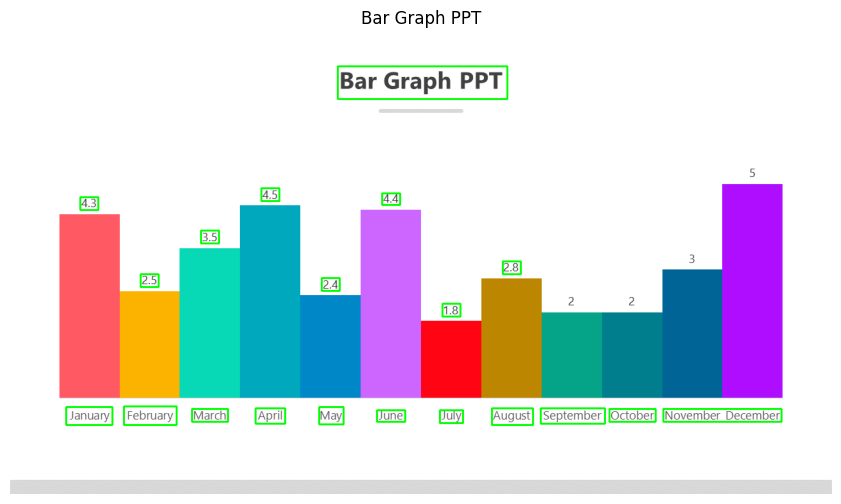

In [21]:
# Paths
image_path = 'dataset_part2/image_1.png'
output_dir = 'output_bboxes'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Initialize EasyOCR reader (use ['en'] for English; you can add other languages)
reader = easyocr.Reader(['en'])

# Read the image
image = cv2.imread(image_path)

# OCR text detection
results = reader.readtext(image)
title_text = []
topmost_y = float('inf')

for (bbox, text, confidence) in results:
    if confidence > 0.1:
        # bbox is a list of 4 points [(x0, y0), (x1, y1), (x2, y2), (x3, y3)]
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))

        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        y = top_left[1]
        if y <= topmost_y + 10:
            topmost_y = min(topmost_y, y)
            title_text.append(text)

# Combine title text
full_title = ' '.join(title_text)

# Save output image
output_path = os.path.join(output_dir, "image_1_bboxes_easyocr.png")
cv2.imwrite(output_path, image)

print(f"\n Image: image_1.png")
print(f"Extracted Title: {full_title if full_title else '[Title not found]'}")
print(f"Saved: {output_path}")
all_text = [text for (_, text, _) in results]
print(f"All text: {all_text}")

# Show the result
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title(full_title if full_title else '[Title not found]')
plt.show()


### You can see that in this example Pytesseract works better then EasyOCR with detecting text data, because of the connection that is still active between "November" and "December"

### The top text is better detected although this is an easy code fix by combining the bounding boxes in the top with Pytesseract.

### So we will extract all the needed "text" data here:

### Lets start with extracting the title from the image using EasyOCR

In [22]:
# Path to image
image_path = 'dataset_part2/image_1.png'

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Read the image
image = cv2.imread(image_path)

# OCR text detection
results = reader.readtext(image)
title_text = []
topmost_y = float('inf')

for (bbox, text, confidence) in results:
    if confidence > 0.1:
        # bbox is a list of 4 points [(x0, y0), (x1, y1), (x2, y2), (x3, y3)]
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))

        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        y = top_left[1]
        if y <= topmost_y + 10:
            topmost_y = min(topmost_y, y)
            title_text.append(text)

print(f"The extracted title is: {title_text}")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


The extracted title is: ['Bar Graph PPT']


### There are no axis in this image so there is no need to extract that!